In [38]:
import tensorflow as tf
import numpy as np

a = tf.placeholder(tf.float32, [2, 2])
b = tf.placeholder(tf.float32, [2, 1])

p = tf.matmul(a, b) + [[1], [1]]

with tf.Session() as sess:
    print sess.run(p, feed_dict = {a: [[3, 1], [3, 1]], b: [[7], [1]]})

[[ 23.]
 [ 23.]]


In [25]:
import tensorflow as tf
import numpy as np

X = np.array([[1, 3.1], [2.7, 3], [1.6, 2]])
N, D = X.shape
y = np.array([1, 0, 1])
ybar = np.mean(y)
w0 = np.log(ybar / (1 - ybar))

w = tf.Variable(tf.zeros([D, 1], dtype = tf.float64))
mu = tf.sigmoid(tf.matmul(X, w) + w0)
nll = -tf.reduce_sum(y * tf.log(mu) + (1 - y) * tf.log(1 - mu))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print sess.run(tf.matmul(X, w))
    print sess.run(nll)
    print sess.run(mu)

[[ 0.]
 [ 0.]
 [ 0.]]
5.72862751465
[[ 0.66666667]
 [ 0.66666667]
 [ 0.66666667]]


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import classify
import mcc
import datasets

In [2]:
X, y = datasets.htwt()

In [3]:
import nb
import lda
import qda
import rda
import flda
import nsc
import irls
import logistic
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import NearestCentroid
import statsmodels.api as sm

In [4]:
clf = BernoulliNB()
clf = nb.bernoulli()
clf = GaussianNB()
clf = nb.gaussian()
clf = NearestCentroid()
clf = nsc.Classifier()
# clf = LinearDiscriminantAnalysis()
clf = lda.Classifier()
clf = qda.Classifier()
clf = rda.Classifier()
clf = flda.Classifier()
# clf = QuadraticDiscriminantAnalysis()
clf = irls.Classifier()
clf = LogisticRegression()
clf = logistic.Classifier()

In [23]:
fit = sm.Logit(y, sm.add_constant(X)).fit_regularized(disp = 0)
p = fit.predict(sm.add_constant(X))
yhat = (p > 0.5) * 1
print '%0.3f' % np.mean(np.mean(yhat != y))

0.119


In [44]:
reload(logistic)
clf = logistic.Classifier()

clf.fit(X, y)
print '%0.3f' % np.mean(np.mean(clf.predict(X) != y))

(array([[ 0.69314718],
       [ 0.69314718],
       [ 0.69314718]]), array([[-0.13258384],
       [-0.06040405]]))
0.667


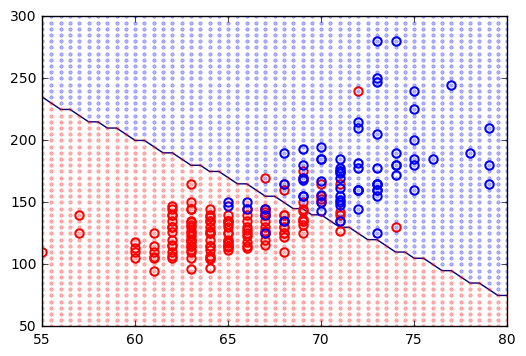

In [7]:
classify.show_points(X, y)
classify.show_regions(clf, X)
# classify.show_contour(clf, X)
plt.show()